## F770W - SMACS0723 - col/row pull up down cleaning

Author: Karl Gordon

Last modified: 10 Aug 2022

### Variables controling processing and display

In [1]:
filter = "F770W"
fwhm = 2.2
exclude_above = None
ds9point = "rowcol_points.reg"

crval = [110.8261940446365, -73.45398878295636]
# rotation = 63.0
# crval = None
rotation = None

tweakreg = False
align_to_gaia = False

matchbkg = False

# display range for images
drange_cal = [-0.1, 5.0]
dmap = "afmhot"  # same as ds9 bb

run_cc_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii, fits
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds-pub.stsci.edu"

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image
from helpers.miri_clean import make_sky, fix_rowcol_pull_updown
from helpers.miri_helpers import miri_image3

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


### Clean col/row pull up/down if desired

In [8]:
if ds9point is not None:
    miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_wcs_skysub_cal.fits")
    for cfile in miri_cal_files:
        fix_rowcol_pull_updown(cfile, ds9point, xwidth=40, ywidth=40, xoffset=100, yoffset=100, cortype=None)  # ["topbotright"])

on image ./F770W/stage2/jw02736002001_02101_00002_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02736002001_02101_00008_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02736002001_02101_00010_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02736002001_02101_00006_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02736002001_02101_00007_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02736002001_02101_00004_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02736002001_02101_00003_mirimage_fixed_wcs_skysub_cal.fits


### rerun CALWEBB_IMAGE3 with the new cleaned files

In [9]:
if run_cc_image3:
    miri_cccal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_wcs_skysub_cal_colrow.fits")
    output_dir = f"./{filter}/stage3/"
    print(miri_cccal_files)

    if rotation is not None:
        miri_asn_name = f'miri_{filter}_stage3_nirproj_asn_skysub_colrow'
    else: 
        miri_asn_name = f'miri_{filter}_stage3_asn_skysub_colrow'
    miri_asn = asn_from_list.asn_from_list(miri_cccal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

    miri_asn_file = f'{miri_asn_name}.json'
    with open(miri_asn_file, 'w') as outfile:
        name, serialized = miri_asn.dump(format='json')
        outfile.write(serialized)

['./F770W/stage2/jw02736002001_02101_00010_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02736002001_02101_00005_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02736002001_02101_00007_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02736002001_02101_00008_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02736002001_02101_00004_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02736002001_02101_00009_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02736002001_02101_00002_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02736002001_02101_00001_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02736002001_02101_00003_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02736002001_02101_00006_mirimage_fixed_wcs_skysub_cal_colrow.fits']


In [10]:
if run_cc_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg,
                crval=crval, rotation=rotation,
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-08-10 10:57:58,000 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-08-10 10:57:58,001 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-10 10:57:58,002 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-08-10 10:57:58,003 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-08-10 10:57:59,952 - stpipe.Image3Pipeline - INFO - Prefetch for APCORR reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_apcorr_0008.fits'.
2022-08-10 10:57:59,953 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-10 10:57:59,955 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-08-10 10:58:02,161 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-08-10 10:58:02,163 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.2, 'snr_threshold': 5, 'brightest': 20

2022-08-10 10:58:32,171 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02736002001_02101_00001_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-08-10 10:58:33,159 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02736002001_02101_00003_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-08-10 10:58:34,141 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02736002001_02101_00006_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-08-10 10:58:34,142 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection done
2022-08-10 10:58:34,299 - stpipe.Image3Pipeline.resample - INFO - Step resample running with args (<ModelContainer>,).
2022-08-10 10:58:34,300 - stpipe.Image3Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'outpu

2022-08-10 10:59:16,649 - stpipe.Image3Pipeline.source_catalog - INFO - AB to Vega magnitude offset 4.38398
2022-08-10 10:59:16,715 - stpipe.Image3Pipeline.source_catalog - INFO - Background could not be estimated in meshes. Using the entire unmasked array for background estimation: bkg_boxsize=(1157, 1126).
2022-08-10 10:59:16,910 - stpipe.Image3Pipeline.source_catalog - INFO - Detected 170 sources
2022-08-10 10:59:17,239 - stpipe.Image3Pipeline.source_catalog - INFO - Wrote source catalog: ./F770W/stage3/miri_F770W_stage3_asn_skysub_colrow_cat.ecsv
2022-08-10 10:59:17,477 - stpipe.Image3Pipeline.source_catalog - INFO - Saved model in ./F770W/stage3/miri_F770W_stage3_asn_skysub_colrow_segm.fits
2022-08-10 10:59:17,478 - stpipe.Image3Pipeline.source_catalog - INFO - Wrote segmentation map: miri_F770W_stage3_asn_skysub_colrow_segm.fits
2022-08-10 10:59:17,479 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog done
2022-08-10 10:59:17,481 - stpipe.Image3Pipeline - INFO -

In [11]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_mosaic = datamodels.open(miri_mosaic_file)

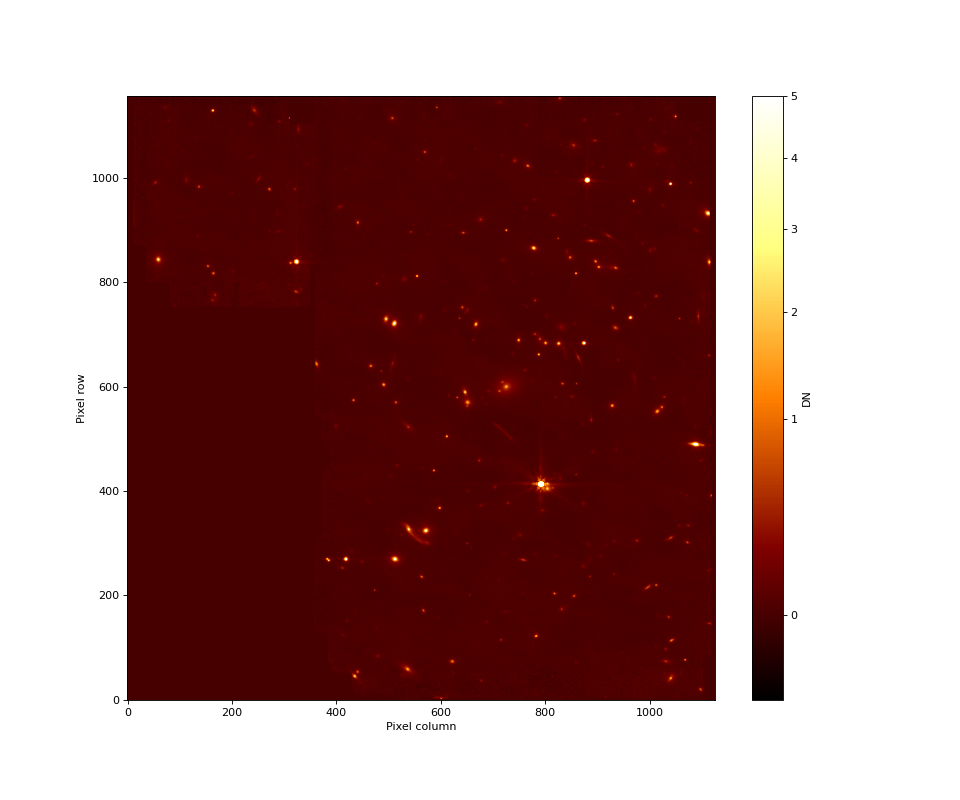

In [12]:
drange = drange_cal
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)